# Approche du codage des réels

## I. Rappels sur la norme IEEE 754


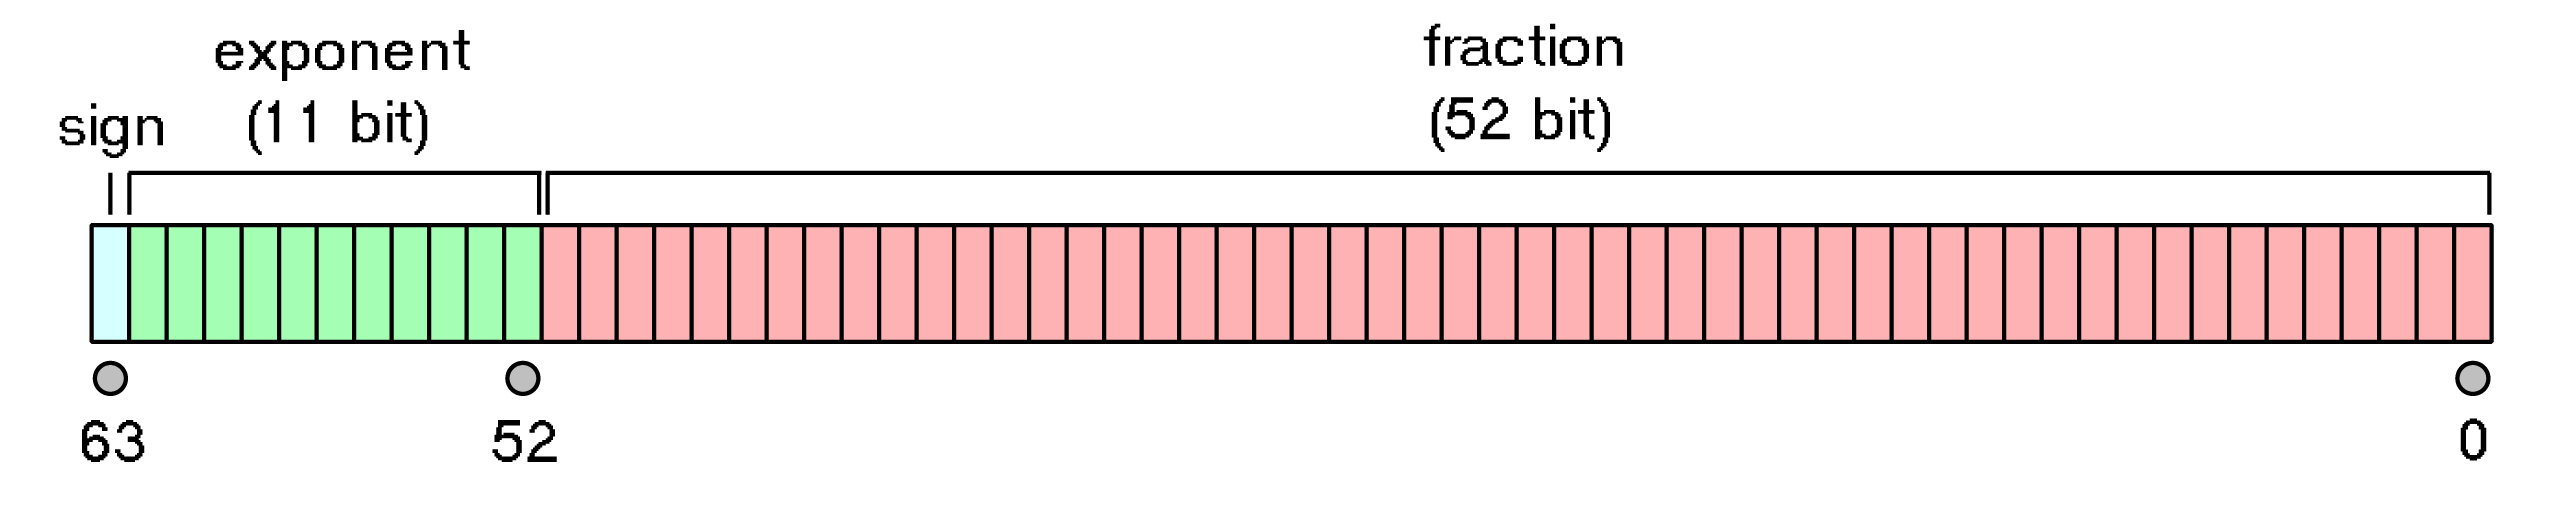

By Codekaizen - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=3595583

$s$ est le bit de signe (bit 63 représenté en bleu).   
$e$ est codé sur les 11 bits représentés en vert.   
$f$ est codé sur les 52 bits représentés en rouge.   
La mantisse $m$ est égale à $1,f$. (Le "$1,$" étant évident n'est pas codé pour économiser un bit).  
Soit $x$ le réel ainsi codé :  
$x = (-1)^{s} \times m \times 2^{e-1023}$


## I. 🤔  Etude d'un exemple 
Le script ci-dessous est théoriquement une boucle infinie. Or lorsqu'on l'exécute, on s'aperçoit qu'il ne s'effectue que 53 tours de boucles.

In [1]:
x = 1.0
y = x + 1.0
cpt = 0
while y != x:
    x = x * 2
    y = x + 1.0
    cpt = cpt + 1
    print("x = ",x,"  y = ",y)
print("x = ", x)
print("y = ", y)
print("y-x = ", y - x)
print("nombre de boucles effectuees : ", cpt)

x =  2.0   y =  3.0
x =  4.0   y =  5.0
x =  8.0   y =  9.0
x =  16.0   y =  17.0
x =  32.0   y =  33.0
x =  64.0   y =  65.0
x =  128.0   y =  129.0
x =  256.0   y =  257.0
x =  512.0   y =  513.0
x =  1024.0   y =  1025.0
x =  2048.0   y =  2049.0
x =  4096.0   y =  4097.0
x =  8192.0   y =  8193.0
x =  16384.0   y =  16385.0
x =  32768.0   y =  32769.0
x =  65536.0   y =  65537.0
x =  131072.0   y =  131073.0
x =  262144.0   y =  262145.0
x =  524288.0   y =  524289.0
x =  1048576.0   y =  1048577.0
x =  2097152.0   y =  2097153.0
x =  4194304.0   y =  4194305.0
x =  8388608.0   y =  8388609.0
x =  16777216.0   y =  16777217.0
x =  33554432.0   y =  33554433.0
x =  67108864.0   y =  67108865.0
x =  134217728.0   y =  134217729.0
x =  268435456.0   y =  268435457.0
x =  536870912.0   y =  536870913.0
x =  1073741824.0   y =  1073741825.0
x =  2147483648.0   y =  2147483649.0
x =  4294967296.0   y =  4294967297.0
x =  8589934592.0   y =  8589934593.0
x =  17179869184.0   y =  17179869

## Codage de x et y avec la norme IEEE-754 :


x et y sont positifs, donc dans tous les cas s = 0.

$2.0 = 10_{2} = 1,0_{2}\times   2^{1}$   Donc $1=e-1023$ donc $e=1024=10000000000_{2} \quad    m=1,0         \quad      f=0…  $  
$3.0 = 11_{2} = 1,1_{2}\times   2^{1}$   Donc $1=e-1023$ donc $e=1024=10000000000_{2} \quad    m=1,10         \quad      f=10…  $  

$4.0 = 100_{2} = 1,0_{2}\times   2^{2}$   Donc $2=e-1023$ donc $e=1025=10000000001_{2} \quad    m=1,0...         \quad      f=0…  $  
$5.0 = 101_{2} = 1,01_{2}\times   2^{2}$   Donc $2=e-1023$ donc $e=1025=10000000001_{2} \quad    m=1,010...         \quad      f=010…  $  

$8.0 = 1000_{2} = 1,0_{2}\times   2^{3}$   Donc $3=e-1023$ donc $e=1026=10000000010_{2} \quad    m=1,0...         \quad      f=0…  $  
$9.0 = 1001_{2} = 1,001_{2}\times   2^{3}$   Donc $3=e-1023$ donc $e=1026=10000000010_{2} \quad    m=1,0010...         \quad      f=0010…  $  

$16.0 = 10000_{2} = 1,0_{2}\times   2^{4}$   Donc $4=e-1023$ donc $e=1027=10000000011_{2} \quad    m=1,0...         \quad      f=0…  $  
$17.0 = 10001_{2} = 1,0001_{2}\times   2^{4}$   Donc $4=e-1023$ donc $e=1027=10000000011_{2} \quad    m=1,00010...         \quad      f=00010…  $  

Etc...

On peut représenter ces résultats dans le tableau suivant :

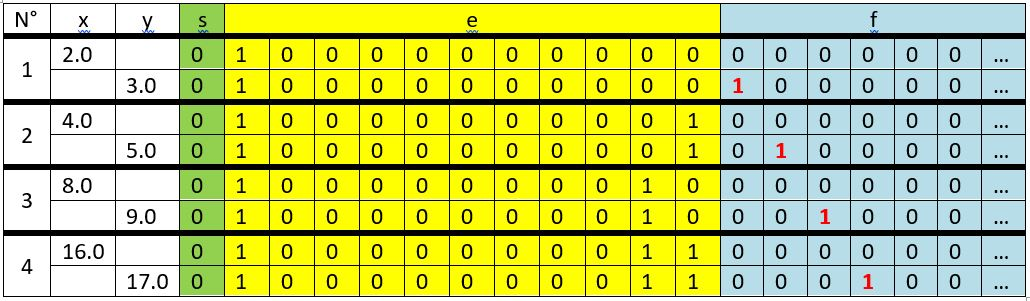

A chaque tour de boucle s et e sont identiques pour x et y.  
A chaque tour de boucle pour x on a f = 0…  
Au 52ème tour de boucle le « 1 » se trouvant dans les 52 bits du « f » de y, se trouvera sur le 52ème bit.  
Au 53ème tour de boucle, ce « 1 » sera donc perdu, et le codage de x et de y seront identiques.  
Au 53ème tour de boucle, le programme affiche donc : y - x = 0.0


In [2]:
9007199254740992.0 + 1.0

In [3]:
9007199254740992.0 + 1.0 + 1.0

In [4]:
9007199254740992.0 + 2.0

In [5]:
9007199254740992.0 + 1.0 + 1.0 + 1.0

## II. 💡 Remarque : Il existe un convertisseur Standard IEEE-754 : 

http://www.binaryconvert.com/result_double.html

Vous pouvez l'utiliser pour vérifier certains codages.

## III. ⚠️ Conséquence

Il faut éviter de comparer deux flottants entre eux.


In [6]:
0.37 + 0.2 - 0.57 == 0

Comment résoudre ce problème?  
- Dans la pratique on regardera si la distance entre $0.37+0.2$ et $0.57$ est plus petite qu'un certain nombre epsilon, très petit, défini dans le programme .  
- En mathématiques, en seconde, vous avez appris que la distance entre deux nombres $a$ et $b$ était égale à la valeur absolue de $b-a$ que l'on note $\lvert {b-a} \rvert$  
- Posons epsilon $=10^{-10}$ ($= 0,0000000001$)

En Python, la valeur absolue d'un nombre s'obtient avec la fonction `abs`.  
Tester ci-dessous.

In [7]:
abs(-3)

In [8]:
abs(5)

In [9]:
abs(5 - 3)

In [10]:
abs(3 - 5)

Pour savoir si $0.37+0.2-0.57$ est égal à zéro, nous choisirons par exemple de faire le test suivant :


In [12]:
abs(0.37 + 0.2  -0.57) <= 10**(-10)



Attention :

In [11]:
abs(0.37 + 0.2 - 0.57) <= 10**(-20)

In [13]:
abs(0.37 + 0.2 - 0.57)

Autre calcul célèbre :

In [14]:
0.1 + 0.2 - 0.3



💡 **Méthode à préconiser :**  
Dès que l'on peut on travaille avec des entiers. Dans cet exemple, il suffisait de comparer $37+20-57$ à $0$.

In [15]:
37 + 20 - 57 == 0

Mireille COILHAC  
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.
